# <font color = blue> Movie Analysis Using Python </font>

We have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this analysis, we will try to find some interesting insights into these movies and their voters, using Python.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##  Task 1: Going through the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and we should store it in a dataframe `movies`.

In [9]:
movies = pd.read_csv("MovieAssignmentData.csv")

- ###  Subtask 1.2: Check the Dataframe

Check the dataframe for dimensions, null-values, and summary of different numeric columns.

In [10]:
movies.shape

(100, 62)

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [12]:
movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## Task 2: Data Analysis

Now from the above checks, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [13]:
movies.loc[:,["Gross","budget"]].head()

,Gross,budget
0,151101803,30000000
1,341268248,150000000
2,51738905,12000000
3,100546139,47000000
4,47695371,9000000


In [14]:
movies["Gross"] = movies["Gross"] / 1000000
movies["budget"] = movies["budget"] / 1000000

In [15]:
movies.loc[:,["Gross","budget"]].head()

,Gross,budget
0,151.101803,30.0
1,341.268248,150.0
2,51.738905,12.0
3,100.546139,47.0
4,47.695371,9.0


  ###  Subtask 2.2: Let's Take Profit since there is no column with data profit!

  I Created a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.

In [16]:
movies["profit"] = movies["Gross"] - movies["budget"]

In [17]:
movies.head(1)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803


# Sorting the dataframe with the 'profit' column as reference using the 'sort_values' function.



In [21]:
movies.sort_values(by = "profit", ascending = False, inplace = True)

In [22]:
movies.reset_index(drop = True, inplace = True)

In [24]:
movies.head(4)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
1,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
2,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
3,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577


# I Extract the top ten profiting movies in descending order and store them in a new dataframe - top10

In [25]:
top10 = movies.loc[:9,:].copy()

In [26]:
top10.shape

(10, 63)

In [91]:
movies["profit_colors"] = movies.profit.apply(lambda x: "Blue" if x < 0 else "Orange")

In [ ]:
# I Plotted a scatter plot between the columns budget and profit and write a few words on what you observed


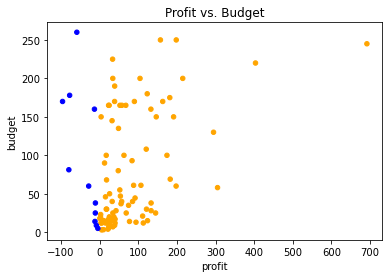

In [92]:
movies.plot(kind = "scatter", x = "profit", y = "budget", c = "profit_colors", title = "Profit vs. Budget")
plt.show()

## From the above analysis we can find out that

- A couple of movies with large budgets having a negative value for Profit.
- There is one movie which has both high budget (approx. `250 Million`) and a very high profit (approx. `700 Million`)

The dataset contains the 100 best performing movies from the year 2010 to 2016. However, the scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

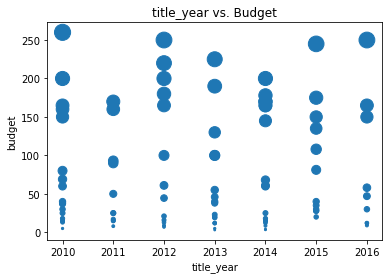

In [104]:
movies.plot(kind = "scatter", x = "title_year", y = "budget", s = "budget", title = "title_year vs. Budget")
plt.show()

# Find the movies with negative profit


In [36]:
neg_profit = movies[movies.profit < 0]

In [37]:
neg_profit.profit.value_counts()

-4.776162     1
-8.674623     1
-11.096291    1
-11.348338    1
-12.247786    1
-13.594629    1
-28.505730    1
-59.192738    1
-77.810499    1
-79.860848    1
-96.179906    1
Name: profit, dtype: int64

In [40]:
# To check if we have "Tangled" movie
neg_profit[neg_profit["Title"] == "Argo"]

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,profit_colors


### Since Argo is profitable movie it's not available in neg_profit

# Subtask 2.3: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It will be interesting to see how this variable this distributed. We plot a `histogram` of seaborn to find the `Runtime` range most of the movies fall into.

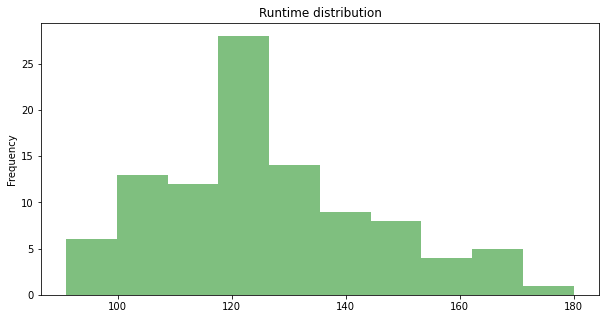

In [42]:
movies.Runtime.plot(kind = "hist", title = "Runtime distribution", color = "green", alpha = 0.5, figsize = (10,5))
plt.show()

Most of the movies appear to be around 120 min.

# Subtask 2.4: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. We store these in a dataframe named `PopularR`.

In [44]:
PopularR = movies[ movies["content_rating"] == "R" ].sort_values(by = "CVotesU18", ascending = False).head(10)

In [45]:
PopularR.reset_index(drop = True)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,profit_colors
0,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,Orange
1,The Wolf of Wall Street,2013,100.0,116.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.6,7.6,7.5,7.8,8.1,8.1,R,USA,16.866727,Orange
2,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,Orange
3,Mad Max: Fury Road,2015,150.0,153.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,7.5,7.5,7.2,8.0,8.2,8.0,R,Australia,3.629485,Orange
4,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,Orange
5,The Revenant,2015,135.0,183.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,...,7.8,7.8,7.8,7.6,8.1,7.9,R,USA,48.635922,Orange
6,Shutter Island,2010,80.0,127.968405,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,...,7.5,7.4,7.6,7.6,7.8,8.1,R,USA,47.968405,Orange
7,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,Orange
8,The Grand Budapest Hotel,2014,25.0,59.073773,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,1000.0,670.0,...,7.8,7.8,7.9,7.7,8.1,8.0,R,USA,34.073773,Orange
9,Birdman or (The Unexpected Virtue of Ignorance),2014,18.0,42.335698,Emma Stone,Naomi Watts,Merritt Wever,15000,6000.0,529.0,...,7.2,7.3,7.0,7.1,7.9,7.7,R,USA,24.335698,Orange


### Observations

 As we can observe these kids are fan of Deadpool 

 # task 3 Combine the Dataframe by Genres

#### Creating a dataframe df_by_genre

In [49]:
df_by_genre = movies.loc[:, "genre_1":"VotesnUS"]
df_by_genre.shape

(100, 49)

In [50]:
df_by_genre["cnt"] = 1

In [51]:
df_by_genre.cnt.value_counts()

1    100
Name: cnt, dtype: int64

- Grouping the movies by individual genres.
-columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
-Performing the same operation for genre_2 and genre_3 and store it dataframes df_by_g2 and df_by_g3 respectively.


In [56]:
df_by_g1 = df_by_genre.groupby(by = "genre_1").agg(np.sum)
df_by_g2 = df_by_genre.groupby(by = "genre_2").agg(np.sum)
df_by_g3 = df_by_genre.groupby(by = "genre_3").agg(np.sum)

In [53]:
print("genre_1", df_by_g1.index.unique)
print("genre_2", df_by_g2.index.unique)
print("genre_3", df_by_g3.index.unique)

genre_1 <bound method Index.unique of Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Mystery'],
      dtype='object', name='genre_1')>
genre_2 <bound method Index.unique of Index(['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object', name='genre_2')>
genre_3 <bound method Index.unique of Index(['Adventure', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object', name='genre_3')>


In [54]:
df_add = df_by_g1.add(df_by_g2, fill_value = 0).add(df_by_g3, fill_value = 0)

In [57]:
genre_top10 = df_add[df_add["cnt"] >= 10]

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
for each_col in genre_top10.columns[:-1]:
    genre_top10[each_col] /= genre_top10["cnt"].copy()

In [64]:
genre_top10.loc[:,"VotesM":"VotesnUS"] = genre_top10.loc[:,"VotesM":"VotesnUS"].apply(lambda x: round(x,2))

In [65]:
list_cvotes = genre_top10.loc[:,"CVotes10":"CVotesnUS"].columns
genre_top10[list_cvotes] = genre_top10[list_cvotes].astype(int)

In [61]:
genre_top10.head()

,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,72.096774,127.935484,102144,114433,150895,94262,34688,12693,5386,3064,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,74.763158,126.315789,94596,105636,138482,86367,31896,11551,4817,2718,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,77.818182,114.363636,61960,72566,104837,65707,22825,7551,2792,1430,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,76.333333,124.444444,47333,77867,123948,74054,23644,7702,2984,1639,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,72.260870,117.260870,60157,77173,108993,69176,26099,9863,4237,2444,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0


# Task 3.1 :Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

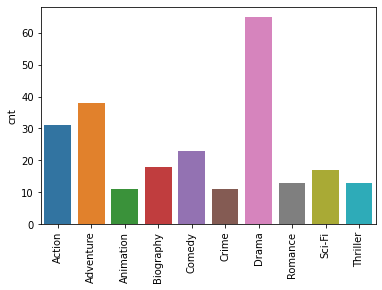

In [67]:
sns.barplot(data = genre_top10, x = genre_top10.index, y = "cnt")
plt.xticks(rotation = 90)
plt.show()

As we can see`Drama`is the tallest bar hence it is the most produced.

  #  Subtask 3.2: Gender and Genre

If we have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

I am taking 2 heat maps here. one for CVotes and one for Votes

# 1st set of heat maps for CVotes-related columns

In [77]:
male_cvotes = pd.pivot_table(data=genre_top10, values = ["CVotesU18M","CVotes1829M","CVotes3044M","CVotes45AM"], index = genre_top10.index, 
               aggfunc = np.mean)
female_cvotes = pd.pivot_table(data=genre_top10, values = ["CVotesU18F","CVotes1829F","CVotes3044F","CVotes45AF"], index = genre_top10.index, 
               aggfunc = np.mean)

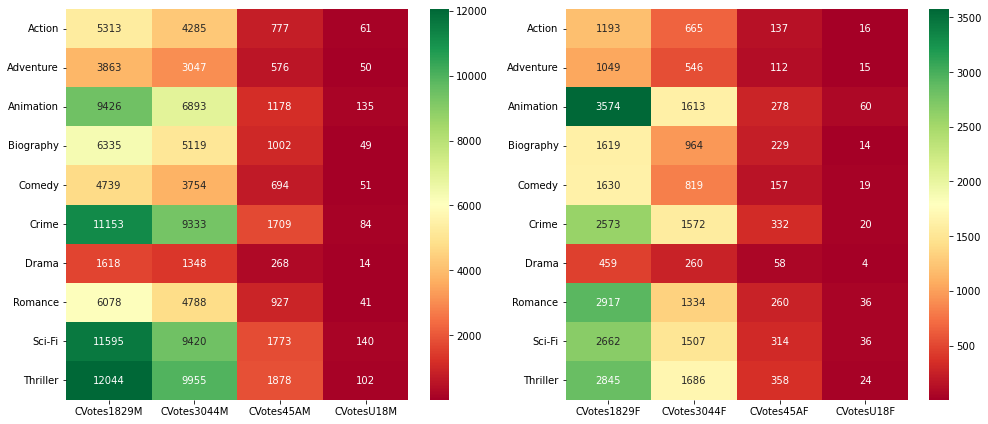

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = [14,6])

sns.heatmap(male_cvotes, cmap = "RdYlGn", annot = True, ax = ax[0], fmt = "d")
sns.heatmap(female_cvotes, cmap = "RdYlGn", annot = True, ax = ax[1], fmt = "d")
plt.tight_layout()

plt.show()

**`Observations:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. Additionally,
- Observation 1: We can see that all movie genres are least voted by Under 18 male and female group. This could be because there could be parental restrictions on the number aof movies that can be seen by these teenagers. There could also be restriction based on content rating which might affect their voting. We still have to verify this cause with other datasets
- Observation 2: `Animation` is the least voted genre by 45 & above female age group whereas it's `Romance` for 45 & above male age group
- Observation 3: `Sci-Fi` is the most voted genre by both male and female 30-44 age group

In [78]:
# 2nd set of heat maps for Votes-related columns


In [79]:
male_votes = pd.pivot_table(data=genre_top10, values = ["VotesU18M","Votes1829M","Votes3044M","Votes45AM"], index = genre_top10.index, 
               aggfunc = np.mean)
female_votes = pd.pivot_table(data=genre_top10, values = ["VotesU18F","Votes1829F","Votes3044F","Votes45AF"], index = genre_top10.index, 
               aggfunc = np.mean)

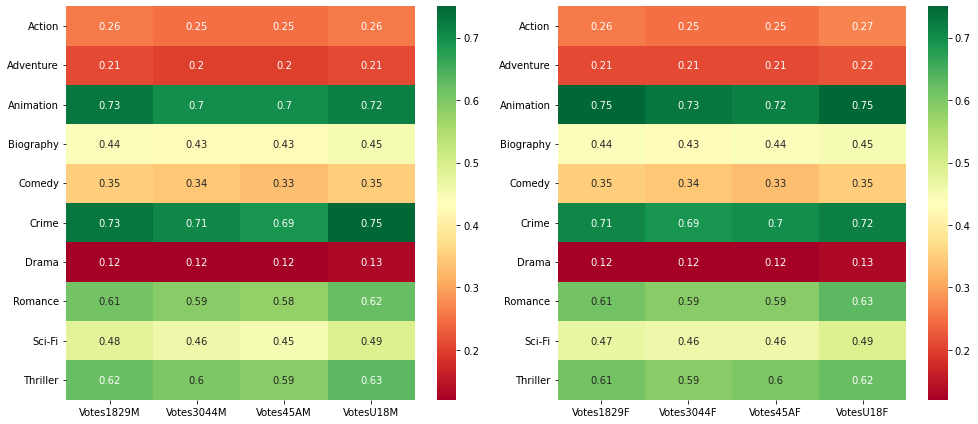

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = [14,6])

sns.heatmap(male_votes, cmap = "RdYlGn", annot = True, ax = ax[0], fmt = "n")
sns.heatmap(female_votes, cmap = "RdYlGn", annot = True, ax = ax[1], fmt = "n")
plt.tight_layout()

plt.show()

**`Observations:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. Additionally,
- Observation 1: *`Romance`* is the worst rated genre by both male and female with age 45 & above. In fact, as we can see from the pattern, the Avg rating decreases through age (U18, U1829, U3044, U45A) for both male and female age groups
- Observation 2: `Animation` movies are highest rated by 18-29 females while `Sci-Fi` are the highest rated by 18-29 males
- Observation 3: `Crime` movies are rated higher by U18 males compared to U18 females